# Introduction

## Problem Statement

## Importing Libraries


In [87]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold, validation_curve
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier



## Reading the Data

In [32]:
filename = 'bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
df.tail()


,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [34]:
df.shape

(3333, 20)

In [35]:
#Check for missing values
print(df.isnull().sum())

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The dataset contains 0 null values

In [36]:
print(df.dtypes)

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [37]:
df.columns.tolist()

['account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

## Exploratory Data Analysis

### Univariate Analysis

#### Distribution of subscribers by target attribute churn. What is the percentage of loyal subscribers?

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='churn', ylabel='count'>

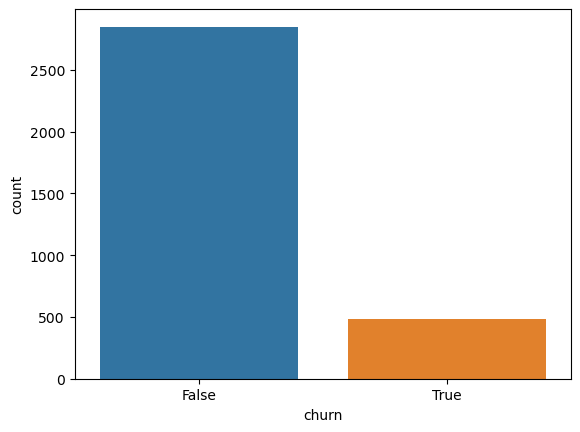

In [38]:
sns.countplot(data=df, x='churn', )

In [39]:
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

###### The above visualization shows the distribution of subscribers using the target variable Churn. It shows that SyriaTel  retain 85.5% of their total customers.

#####   State with the Highest and Lowest Number of Calls (All types of calls)

In [40]:
# State with the highest number of calls
all_calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
total_calls = df.groupby('state')[all_calls].sum().sum(axis=1).sort_values()

print('The state with the highest number of calls is :' , total_calls.idxmax() , total_calls.max())
print('The state with the lowest number of calls is :' , total_calls.idxmin() , total_calls.min())

The state with the highest number of calls is : WV 32682
The state with the lowest number of calls is : CA 10632


#### Checking if subscribers who make international calls purchase the International Call Plan

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

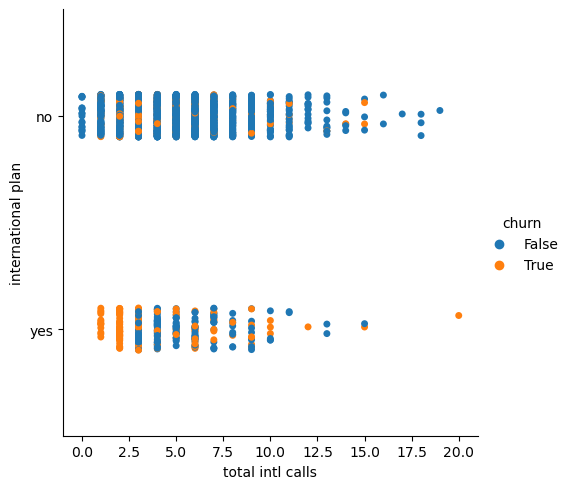

In [41]:
sns.catplot(data=df, x='total intl calls', y='international plan', hue = 'churn')

In [42]:
df.groupby('international plan')['total intl calls'].value_counts()

international plan  total intl calls
no                  3                   595
                    4                   559
                    2                   442
                    5                   439
                    6                   302
                    7                   194
                    1                   147
                    8                   106
                    9                    95
                    10                   43
                    11                   26
                    0                    18
                    12                   14
                    13                   12
                    14                    6
                    15                    5
                    18                    3
                    16                    2
                    17                    1
                    19                    1
yes                 3                    73
                    4                  

#### States with the Highest and Lowest Churn Rate

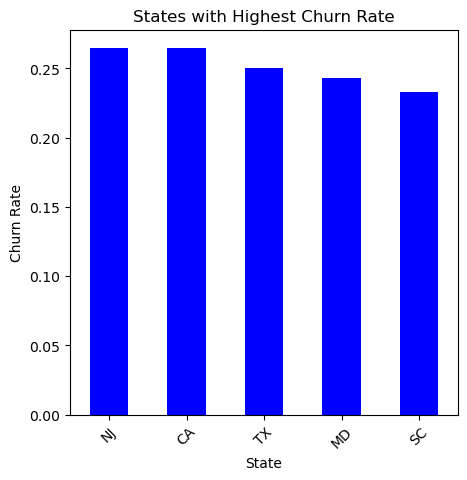

In [43]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5)

# Visualize the states with the highest churn rate using a bar plot
plt.figure(figsize=(5, 5))
top_states_churn.plot(kind='bar', color='blue') 
plt.title('States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

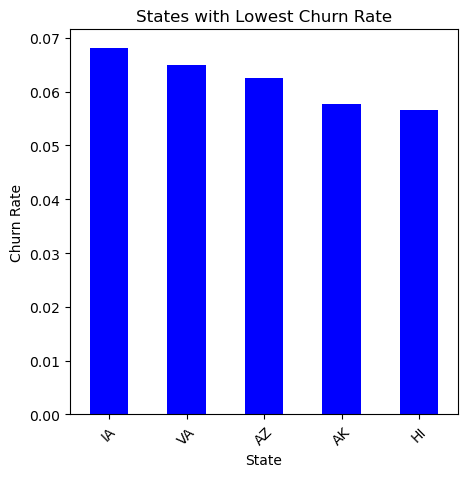

In [44]:
# Calculate the churn rate for each state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Select the top states with the lowest churn rate
low_states_churn = state_churn_rate.tail(5)

# Visualize the states with the lowest churn rate using a bar plot
plt.figure(figsize=(5, 5))
low_states_churn.plot(kind='bar', color='blue') 
plt.title('States with Lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

#### Relationship between calls made to the customer service center and the target variable churn

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

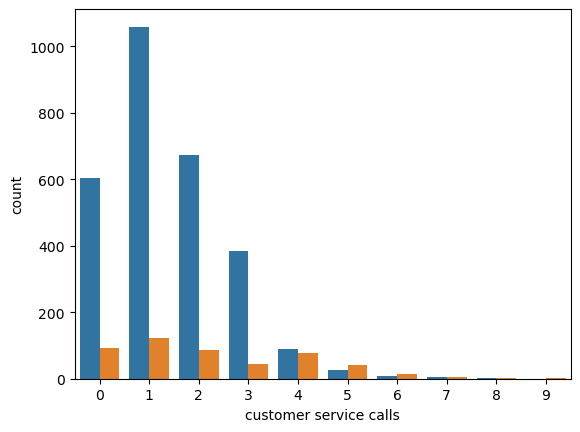

In [45]:
sns.countplot(data=df, x='customer service calls', hue='churn')

#### Correlation between numerical features

In [46]:
# Get descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
description = df[numerical_cols].describe(include='all')
description

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<Axes: >

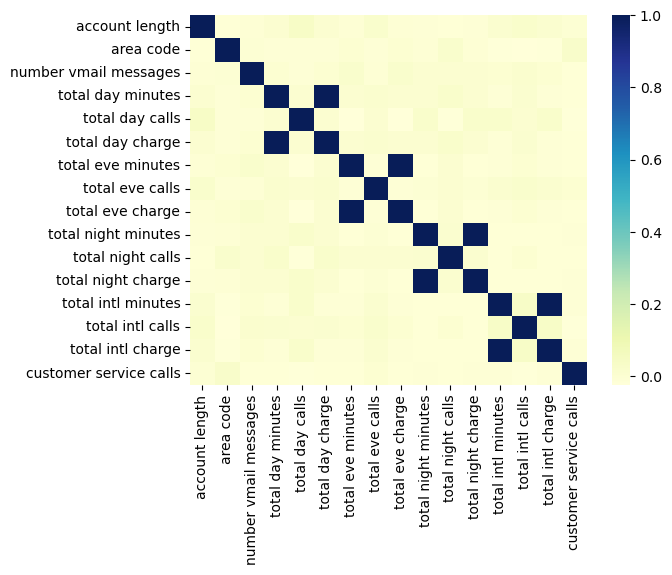

In [47]:
#Which numerical values have the highest degree of correlation
numeric_feats = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'bool')].index
sns.heatmap(df[numeric_feats].corr(), cmap="YlGnBu")

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


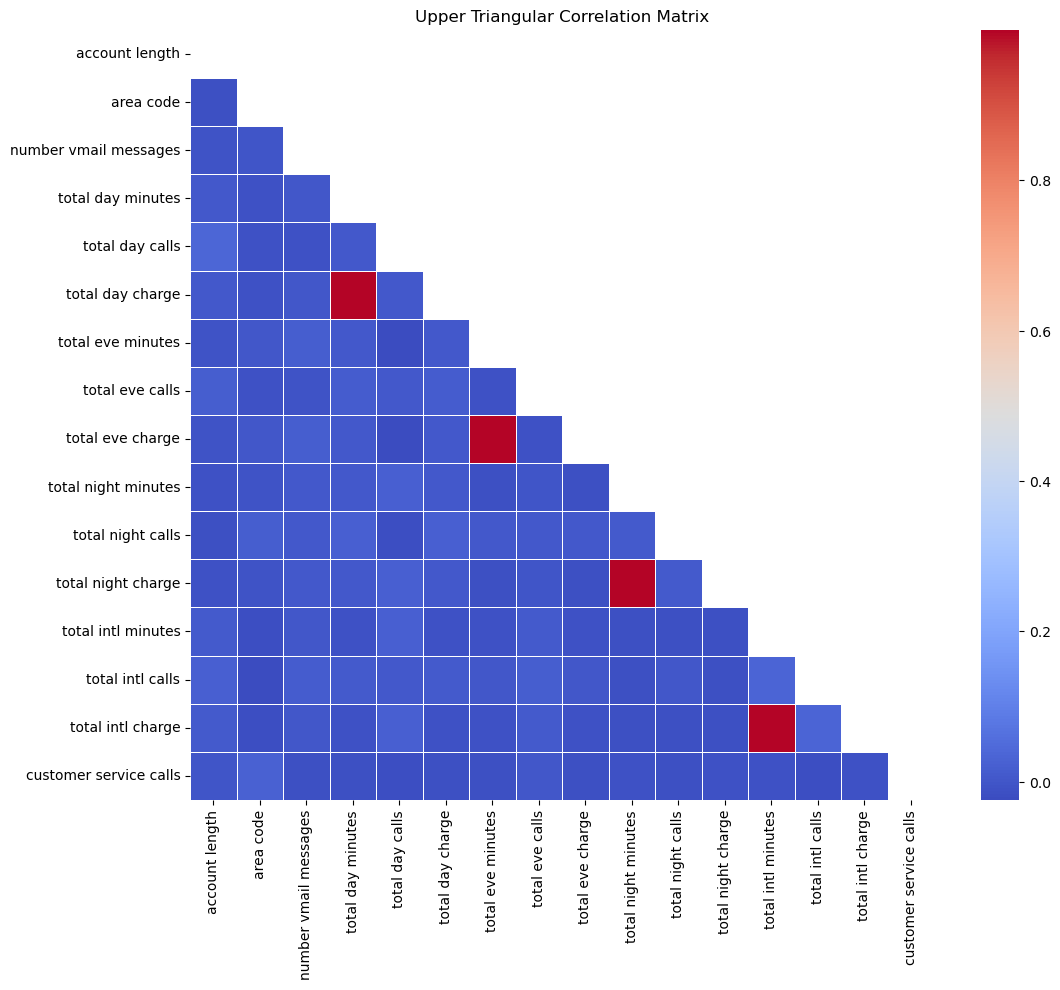

In [48]:
# Select only numeric columns for correlation analysis
numeric_df = df[numeric_feats]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

## Correlation across the different attributes`
Correlation was performed across the different attributes. It is observed that the total minutes and total charge impacts whether a person will churn or not. Apart from that, there is not a lot of correlation between various features in the dataset.

### What other insights can be found in the available data?

Text(0.5, 0, 'Total Night Charge')

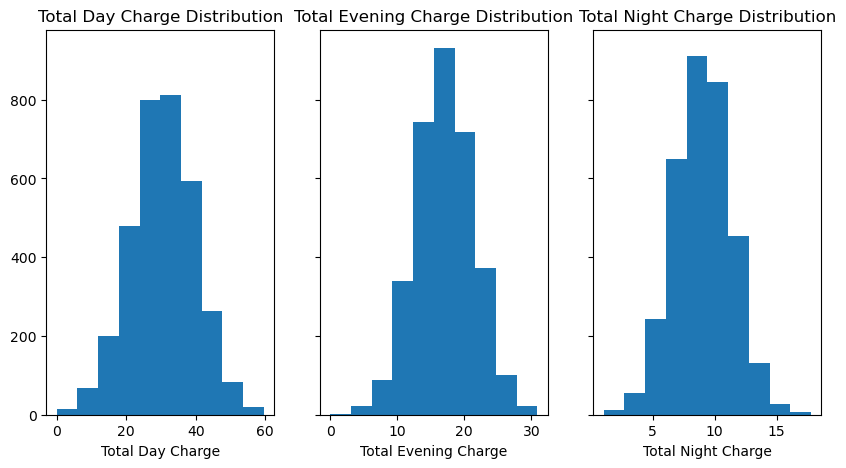

In [49]:
# Relationship Between Day, Evening and Night Charges
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].hist(data=df, x='total day charge', label='Day Charge')
axs[1].hist(data=df, x='total eve charge', label='Evening Charge')
axs[2].hist(data=df, x='total night charge', label = 'Night Charge')

axs[0].set_title('Total Day Charge Distribution')
axs[1].set_title('Total Evening Charge Distribution')
axs[2].set_title('Total Night Charge Distribution')
axs[0].set_xlabel('Total Day Charge')
axs[1].set_xlabel('Total Evening Charge')
axs[2].set_xlabel('Total Night Charge')

In [50]:
print(stats.pointbiserialr(df['churn'], df['total day charge']))
print(stats.pointbiserialr(df['churn'], df['total eve charge']))
print(stats.pointbiserialr(df['churn'], df['total night charge']))

SignificanceResult(statistic=0.20515074317015242, pvalue=5.300605952412188e-33)
SignificanceResult(statistic=0.09278603942871307, pvalue=8.036524227776378e-08)
SignificanceResult(statistic=0.03549555624050648, pvalue=0.040451218769055254)


In [51]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
print(stats.pointbiserialr(df['churn'], df['total charge']))

SignificanceResult(statistic=0.2269617454153734, pvalue=3.3815074744627273e-40)


Text(0.5, 1.0, 'Total Night Charge Distribution')

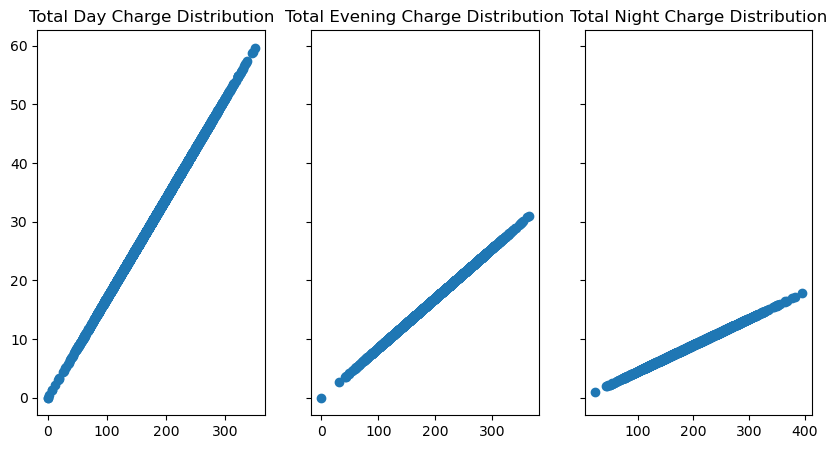

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
axs[0].scatter(data=df, x='total day minutes', y='total day charge')
axs[1].scatter(data=df, x='total eve minutes', y='total eve charge')
axs[2].scatter(data=df, x='total night minutes', y='total night charge')
axs[0].set_title('Total Day Charge Distribution')
axs[1].set_title('Total Evening Charge Distribution')
axs[2].set_title('Total Night Charge Distribution')

In [53]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
print(stats.pointbiserialr(df['churn'], df['total minutes']))

SignificanceResult(statistic=0.19645663173626715, pvalue=2.3690787585908578e-30)


### Data Preprocessing
#### One Hot Encoding 
It involes converting categorical values arranged in a random order into a fromat acceptable by the machine learning algorithms to be used

In [54]:
df.shape

(3333, 22)

In [55]:
df.dtypes

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
total charge              float64
total minutes             float64
dtype: object

In [56]:
ip, vmp = df['international plan'].map({'yes': 1, 'no': 0}), df['voice mail plan'].map({'yes': 1, 'no': 0})

df['international plan'], df['voice mail plan'] = ip, vmp
df['churn'] = df['churn'].astype('int')

df = pd.get_dummies(data=df, columns=['area code'])
df.drop(['phone number'], axis=1, inplace=True)


df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge,total minutes,area code_408,area code_415,area code_510
state,,,,,,,,,,,,,,,,,,,,,
KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,10.0,3,2.70,1,0,72.86,707.2,False,True,False
OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,13.7,3,3.70,1,0,55.54,611.5,False,True,False
NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,12.2,5,3.29,0,0,59.00,527.2,False,True,False
OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,6.6,7,1.78,2,0,65.02,558.2,True,False,False
OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,10.1,3,2.73,3,0,49.36,501.9,False,True,False


Scaling the Data

In [59]:
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df[[column]])

# Iterate through numerical columns and scale them
for column in df.select_dtypes(include=[np.number]).columns:
    df[[column]] = scaling(column)

df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge,total minutes,area code_408,area code_415,area code_510
state,,,,,,,,,,,,,,,,,,,,,
KS,0.524793,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,...,0.500,0.15,0.500000,0.111111,0.0,0.728575,0.717966,False,True,False
OH,0.438017,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,...,0.685,0.15,0.685185,0.111111,0.0,0.489942,0.558916,False,True,False
NJ,0.561983,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,...,0.610,0.25,0.609259,0.000000,0.0,0.537614,0.418813,False,True,False
OH,0.342975,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,...,0.330,0.35,0.329630,0.222222,0.0,0.620557,0.470334,True,False,False
OK,0.305785,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,...,0.505,0.15,0.505556,0.333333,0.0,0.404795,0.376766,False,True,False


In [68]:
target = df.pop('churn').astype(int)
target


state
KS    0
OH    0
NJ    0
OH    0
OK    0
     ..
AZ    0
WV    0
RI    0
CT    0
TN    0
Name: churn, Length: 3333, dtype: int32

#### Splitting Data

Before modeling it is important to split the data into training and test data

In [61]:
# Separate features from the target variable
# Define the target variable and the feature matrix
y = df['churn']  
X = df.drop('churn', axis=1)  

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Check the shapes of the split data
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2666, 22)
Test set size: (667, 22)


In [62]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)
preds = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.9820089955022488


In [63]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 21, 2),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(tree, params, cv=kf, scoring='accuracy', n_jobs=-1)
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

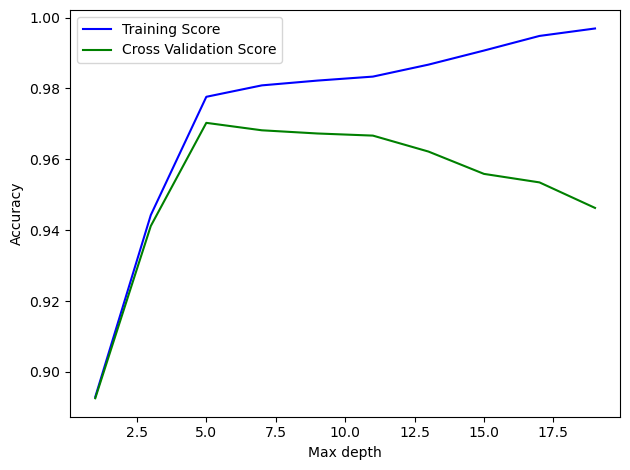

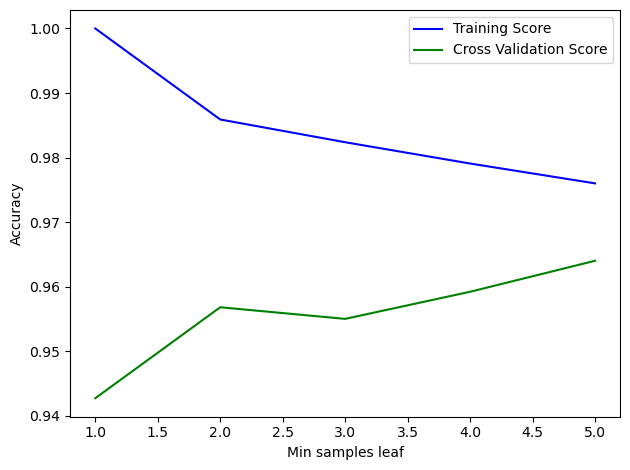

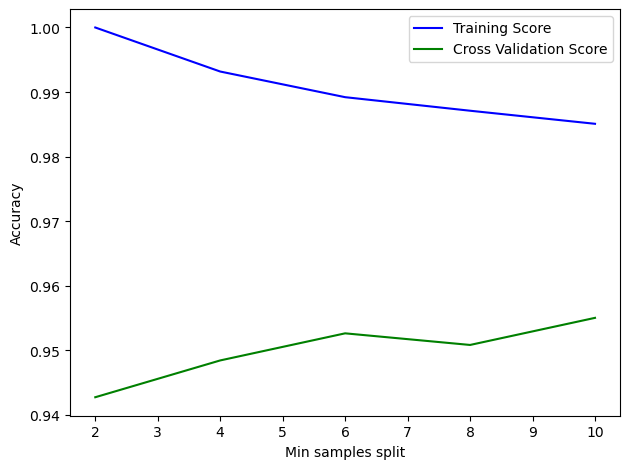

In [69]:
md_train_score, md_test_score = validation_curve(tree, df, target,
                                           param_name = 'max_depth',
                                           param_range = params['max_depth'], cv = 5, scoring = 'accuracy')
msl_train_score, msl_test_score = validation_curve(tree, df, target,
                                           param_name = 'min_samples_leaf',
                                           param_range = params['min_samples_leaf'], cv = 5, scoring = 'accuracy')
mss_train_score, mss_test_score = validation_curve(tree, df, target,
                                           param_name = 'min_samples_split',
                                           param_range = params['min_samples_split'], cv = 5, scoring = 'accuracy')

md_train_score, md_test_score = np.mean(md_train_score, axis=1), np.mean(md_test_score, axis=1)
msl_train_score, msl_test_score = np.mean(msl_train_score, axis=1), np.mean(msl_test_score, axis=1)
mss_train_score, mss_test_score = np.mean(mss_train_score, axis=1), np.mean(mss_test_score, axis=1)
 
plt.plot(params['max_depth'], md_train_score, label = 'Training Score', color = 'b')
plt.plot(params['max_depth'], md_test_score, label = 'Cross Validation Score', color = 'g')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

plt.plot(params['min_samples_leaf'], msl_train_score, label = 'Training Score', color = 'b')
plt.plot(params['min_samples_leaf'], msl_test_score, label = 'Cross Validation Score', color = 'g')
plt.xlabel('Min samples leaf')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

plt.plot(params['min_samples_split'], mss_train_score, label = 'Training Score', color = 'b')
plt.plot(params['min_samples_split'], mss_test_score, label = 'Cross Validation Score', color = 'g')
plt.xlabel('Min samples split')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [74]:
best_tree = tree_grid.best_estimator_
preds = best_tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))

Accuracy: 0.9850074962518741
Precision: 0.9770114942528736
Recall: 0.9139784946236559
F1: 0.9444444444444444


c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

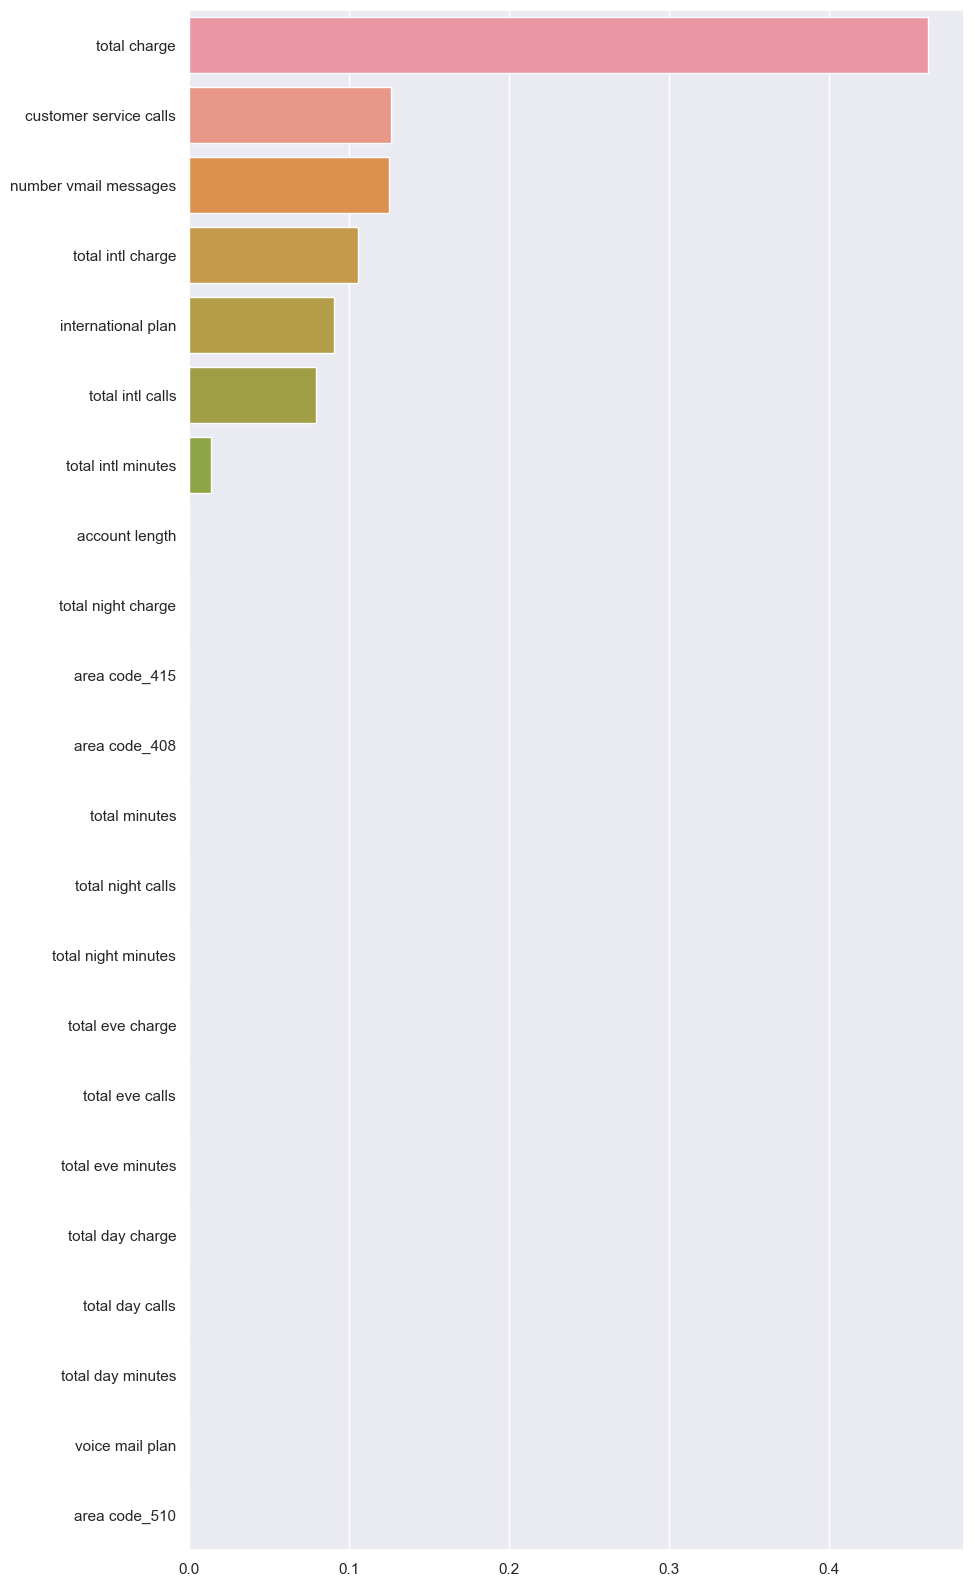

In [76]:
sns.set(rc={'figure.figsize':(10, 20)});

tree_feature_importances = pd.Series(best_tree.feature_importances_, index=df.columns).sort_values(ascending=False)
sns.barplot(x=tree_feature_importances, y=tree_feature_importances.index)

In [77]:
tree = DecisionTreeClassifier() 
params = {'max_depth': np.arange(1, 11, 2),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'max_features': np.arange(15, 22),
         'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(tree, params, cv=kf, scoring='accuracy', n_jobs=-1)
tree_grid.fit(X_train[tree_feature_importances.index[:21]], y_train)
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 21,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [79]:
best_tree = tree_grid.best_estimator_
preds = best_tree.predict(X_test[tree_feature_importances.index[:21]])
print('Accuracy:', accuracy_score(y_test, preds))
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1:', f1_score(y_test, preds))

Accuracy: 0.9850074962518741
Precision: 0.9770114942528736
Recall: 0.9139784946236559
F1: 0.9444444444444444


In [84]:
export_graphviz(best_tree, out_file='tree.dot', feature_names=df[tree_feature_importances.index[:21]].columns)
print(open('tree.dot').read())

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="total charge <= 0.711\ngini = 0.25\nsamples = 2666\nvalue = [2276, 390]"] ;
1 [label="customer service calls <= 0.389\ngini = 0.175\nsamples = 2458\nvalue = [2220, 238]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="international plan <= 0.5\ngini = 0.118\nsamples = 2266\nvalue = [2123, 143]"] ;
1 -> 2 ;
3 [label="total charge <= 0.701\ngini = 0.062\nsamples = 2054\nvalue = [1988, 66]"] ;
2 -> 3 ;
4 [label="total intl charge <= 0.912\ngini = 0.056\nsamples = 2033\nvalue = [1974, 59]"] ;
3 -> 4 ;
5 [label="total eve charge <= 0.905\ngini = 0.056\nsamples = 2030\nvalue = [1972, 58]"] ;
4 -> 5 ;
6 [label="account length <= 0.917\ngini = 0.055\nsamples = 2027\nvalue = [1970, 57]"] ;
5 -> 6 ;
7 [label="gini = 0.054\nsamples = 2023\nvalue = [1967, 56]"] ;
6 -> 7 ;
8 [label="gini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
6 -> 8 ;
9 [label="gini = 0.444\nsamples = 3\nvalu

#### Random Forest

In [88]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.9880059970014993
